## Exploratory data analysis of NFL player data.
data source: http://nflsavant.com/about.php

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import re

In [2]:
players = pd.read_csv("players_2013-12-12.csv")

In [3]:
players.head(10)

,name,first_name,last_name,birth_city,birth_state,birth_country,birth_date,college,draft_team,draft_round,...,draft_year,position,height,weight,death_date,death_city,death_state,death_country,year_start,year_end
0,Isaako Aaitui,Isaako,Aaitui,NaN,NaN,NaN,1/25/1987,NaN,NaN,NaN,...,NaN,NT,4-Jun,315.0,NaN,NaN,NaN,NaN,2013,2013
1,Faye Abbott,Faye,Abbott,Clearport,OH,USA,1895-08-16,Syracuse,NaN,NaN,...,NaN,BB-FB-TB-QB-WB-,8-May,182.0,1/22/1965,Dayton,OH,NaN,1921,1929
2,Vince Abbott,Vince,Abbott,London,NaN,England,5/31/1958,Washington,NaN,NaN,...,NaN,K,11-May,207.0,NaN,NaN,NaN,NaN,1921,1929
3,Duke Abbruzzi,Duke,Abbruzzi,Warren,RI,USA,8/3/1917,Rhode Island,NaN,NaN,...,NaN,HB-DB,10-May,175.0,12/6/1982,Newport,RI,NaN,1921,1929
4,Karim Abdul-Jabbar,Karim,Abdul-Jabbar,Los Angeles,CA,USA,6/28/1974,UCLA,Miami Dolphins,3rd,...,1996.0,RB,10-May,194.0,NaN,NaN,NaN,NaN,1996,2000
5,Isa Abdul-Quddus,Isa,Abdul-Quddus,NaN,NaN,NaN,8/3/1989,Fordham,NaN,NaN,...,NaN,S,1-Jun,220.0,NaN,NaN,NaN,NaN,1996,2000
6,Hamza Abdullah,Hamza,Abdullah,Los Angeles,CA,USA,8/20/1983,Washington St.,Tampa Bay Buccaneers,7th,...,2005.0,DB,2-Jun,213.0,NaN,NaN,NaN,NaN,1996,2000
7,Husain Abdullah,Husain,Abdullah,Los Angeles,CA,USA,7/27/1985,Washington St.,NaN,NaN,...,NaN,DB,Jun-00,204.0,NaN,NaN,NaN,NaN,1996,2000
8,Khalid Abdullah,Khalid,Abdullah,Jacksonville,FL,USA,3/6/1979,Mars Hill,Cincinnati Bengals,5th,...,2003.0,LB,2-Jun,227.0,NaN,NaN,NaN,NaN,1996,2000
9,Rabih Abdullah,Rabih,Abdullah,Martinsville,VA,USA,4/27/1975,Lehigh,NaN,NaN,...,NaN,RB,Jun-00,220.0,NaN,NaN,NaN,NaN,1996,2000


In [4]:
players.shape #

(23733, 21)

## Some questions I'll use to start exploring the data:
+ Where do NFL players come from? (states and schools)
+ What is the average career length of an NFL player?
+ Has the career length increased/decreased over time?
+ How does position affect career length?
+ Does draft pick have any affect on this?


Where do players come from:

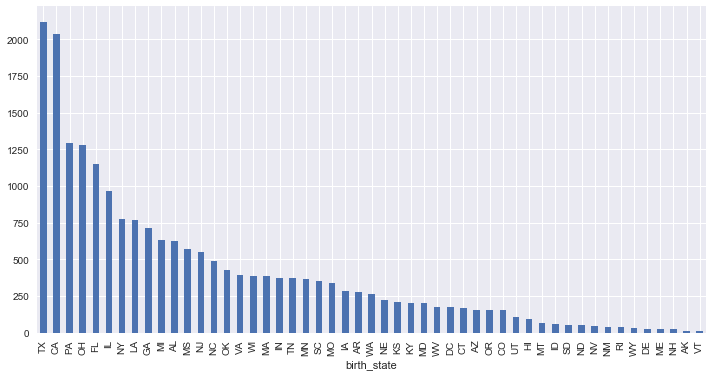

In [162]:
players_by_state = players.groupby(players.birth_state).size() 
players_by_state.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

What colleges do they play for:

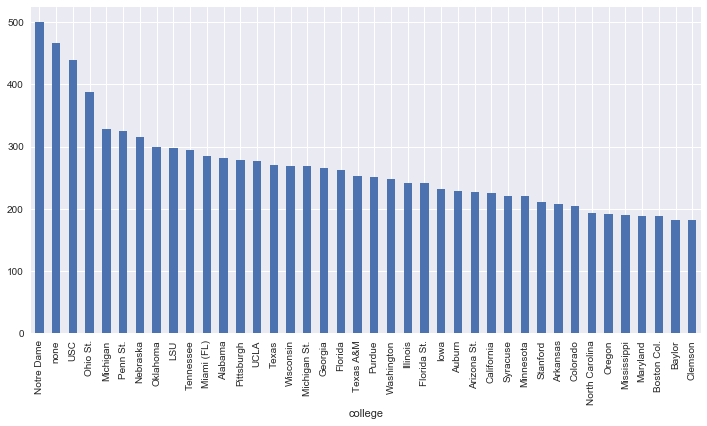

In [165]:
players_by_college = players.groupby(players.college).size()
players_by_college.sort_values(ascending=False).head(40).plot(kind='bar', figsize=(12,6))

Seeing none here refers to not playing in college or being drafted before.

Now we'll add a new column for all players called career_length

In [6]:
players['career_length'] = players.year_end - players.year_start 
players.career_length.head()

0    0
1    8
2    8
3    8
4    4
Name: career_length, dtype: int64

What's the mean career length for an NFL player?

In [7]:
players.career_length.mean()

3.1836683099481733

Let's look at a few visuals to get a better idea of what's happenning. 

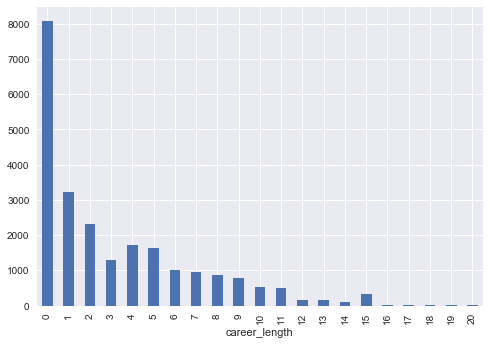

In [8]:
career_length = players.groupby('career_length').size().plot(kind='bar')

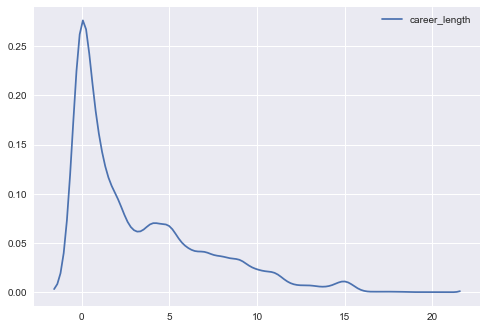

In [9]:
sns.kdeplot(players.career_length)

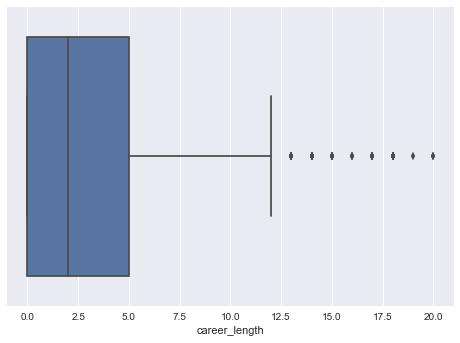

In [10]:
sns.boxplot(players.career_length)

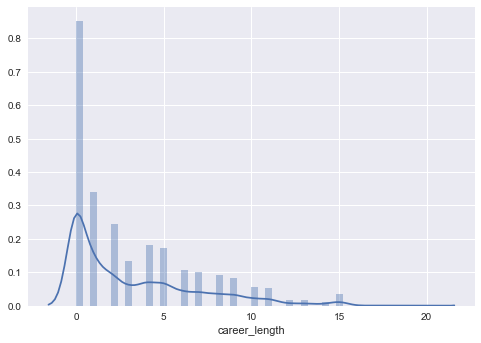

In [11]:
sns.distplot(players.career_length)

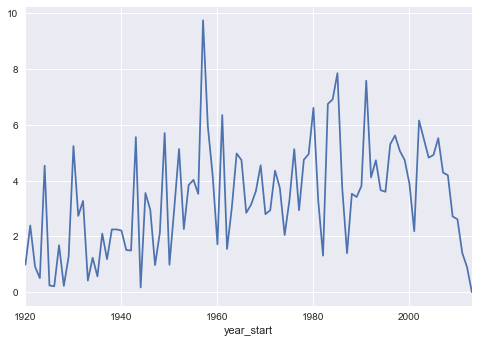

In [12]:
career_by_year = players.groupby('year_start')['career_length'].mean()
career_by_year.plot()

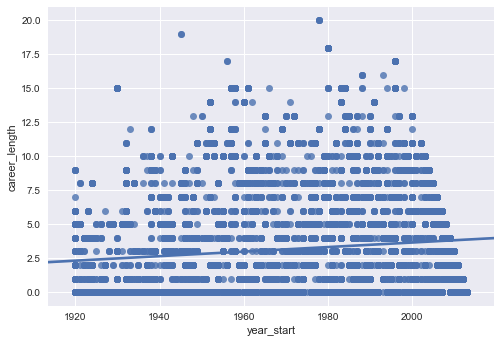

In [13]:
sns.regplot(x="year_start", y="career_length", data=players)

From these two basic plots we can see slight trend to longer careers. However, I think we should consider the NFL really starting with the first Super Bowl.

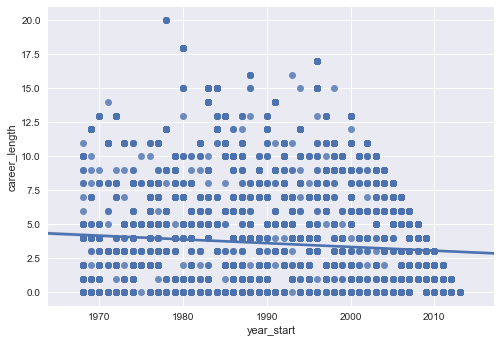

In [14]:
sns.regplot(x="year_start", y="career_length", data=players[players.year_start > 1967]) # first super bowl

Since career length is calculated as year_start - year_end, as we see players that start closer to the end of the data set (2013) we'll only get data points for those that have shorter careers and aren't still playing past 2013. This causes the downward slope we see in the data points and fit line. 

A couple interesting observations so far:
+ We see the majority of the players are in the NFL for less than a year. (likely cut, briefly free agents, injured, don't make the team). It would be interesting to gain more insight here.
+ There are some outliers with almost 7 times the mean! Probably big line men and quarter backs. A positional break down with attention to the outliers will be very interesting.
+ There's a little bump at 15 years. Seems... Odd
+ Career length from the 1920s until now seemed to be increasing. However, when looking from the first Super Bowl onwards (1967-2013), career length seems to be on the decline (much of this is probably attributed to slope in our data points as mentioned above). 


## How does position affects career length
To do this we'll need to break apart the position column since it's common for players to play many positions over their career.

In [15]:
career_by_position = players[['position', 'career_length']]
career_by_position.head()

,position,career_length
0,NT,0
1,BB-FB-TB-QB-WB-,8
2,K,8
3,HB-DB,8
4,RB,4


Let's clean up the position string and break each position value out into its own row:

In [16]:
career_by_position.shape

(23733, 2)

In [17]:
t = career_by_position
t = t[t.position.notnull()] # notnull() gets rid of a few missing data points. 

In [18]:
t['position'] = t['position'].map(lambda x: re.split('-|/', x)) # split on - and /
t.head()

/Users/jacob/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,position,career_length
0,[NT],0
1,"[BB, FB, TB, QB, WB, ]",8
2,[K],8
3,"[HB, DB]",8
4,[RB],4


In [19]:
res = t.set_index(['career_length'])['position'].apply(pd.Series).stack() #Maybe use melt, this is a little slow...

In [20]:
res2 = res.reset_index()

In [21]:
res2.columns = ['career_length', 'useless', 'position'] # 'useless' is the index from the original list of positions. 

In [ ]:
#res2.head(30)

Now we can start exploring how position and career length are connected

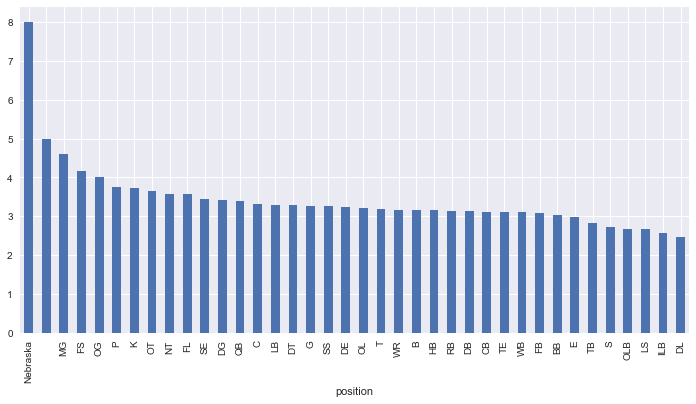

In [22]:
res2.groupby('position')['career_length'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

Looks like an empty string and "Nebraska" made it into the data set. Let's get rid of those.

In [23]:
#nebraska = res2[res2['position'] == "Nebraska"]
res2 = res2.drop(res2.loc[res2['position'] == "Nebraska"].index[0])

In [25]:
res2[res2['position']==""]

,career_length,useless,position
6,8,5,
45,2,6,
24922,5,5,


We'll remove the multiple empty string values by replacing them with nan and using the built in dropna()

In [26]:
res2['position'].replace("", np.nan, inplace=True)
res2[res2['position']==""]

,career_length,useless,position


In [27]:
res2.dropna(subset=['position'], inplace=True) # Now they're removed

Now with "Nebraska" and the empty strings removed we get a cleaner picture with a few clear trends:

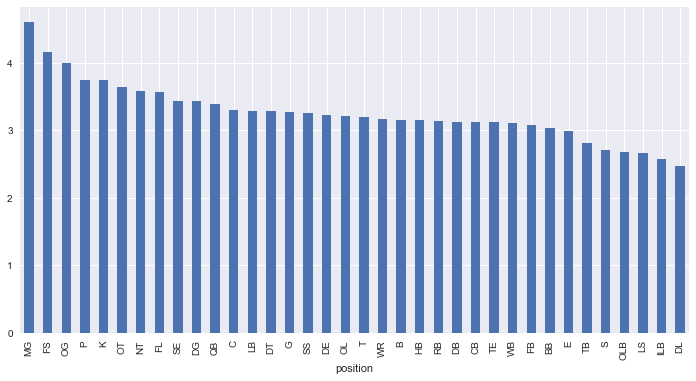

In [72]:
mean_career_length = res2.groupby('position')['career_length'].mean().sort_values(ascending=False)
mean_career_length.plot(kind='bar', figsize=(12,6))

The difference in mean across all positions:

In [77]:
mean_career_delta = mean_career_length[0] - mean_career_length[-1]
mean_career_delta

2.1227272727272726

Slightly over 2 years for difference in mean across all positions is not so bad. This will guide us a little when we look at some of the outliers.

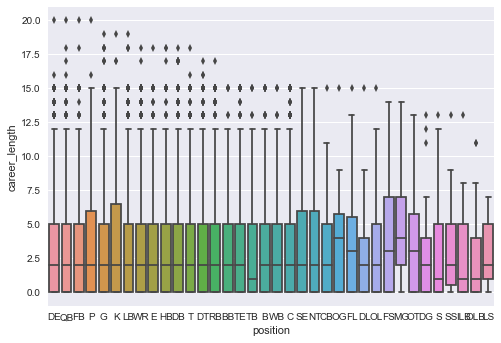

In [50]:
sns.boxplot(x='position', y='career_length', data=res2.sort_values(by='career_length',ascending=False)) # Graphs all the positions...
#sns.boxplot(x='position', y='career_length', data=res2[res2['career_length'].mean().sort_values(ascending=False)])

We now get a better sense for how the outliers are distributed. We also see high medians in the line positions which also follows with the trend we see in the means.  

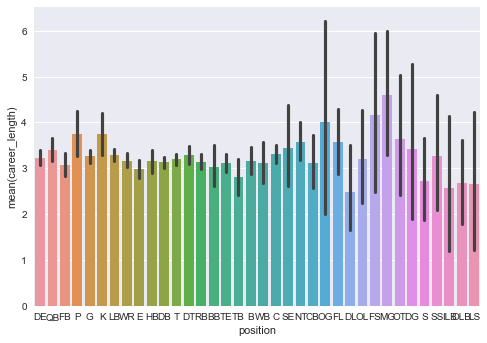

In [80]:
sns.barplot(x='position', y='career_length', data=res2.sort_values('career_length', ascending=False)) #Why doesn't this sort?

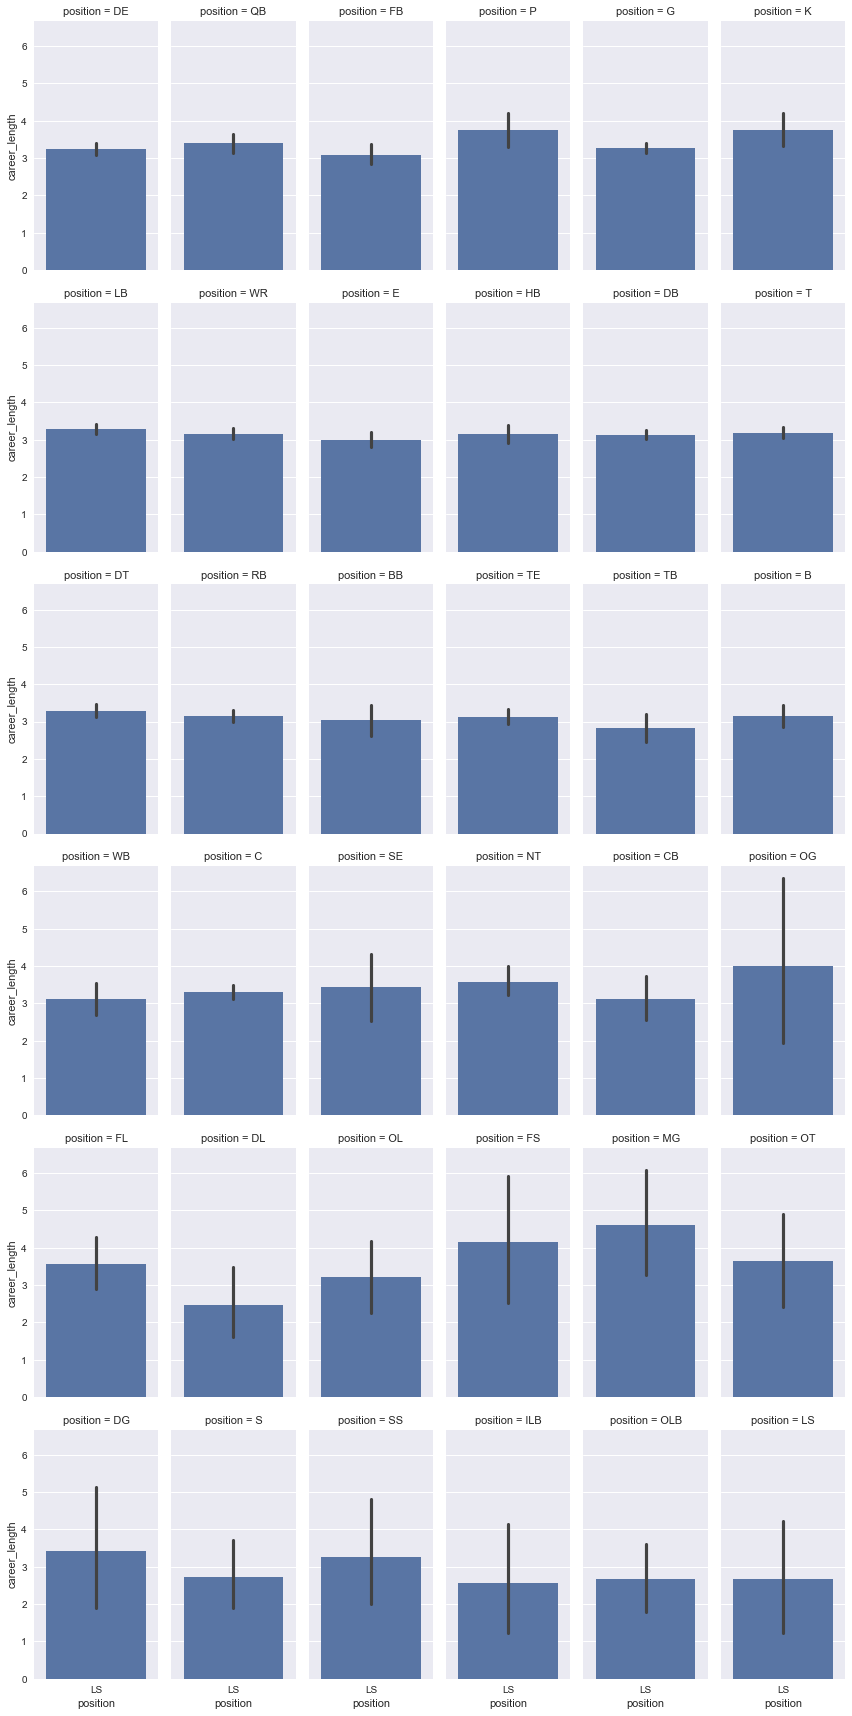

In [83]:
pos_bar_graph = sns.FacetGrid(res2.sort_values(by='career_length',ascending=False), col="position", size=4, aspect=.5, col_wrap=6)
pos_bar_graph = pos_bar_graph.map(sns.barplot, "position", "career_length")

Here are the top 12 side-by-side so we can see the changes.

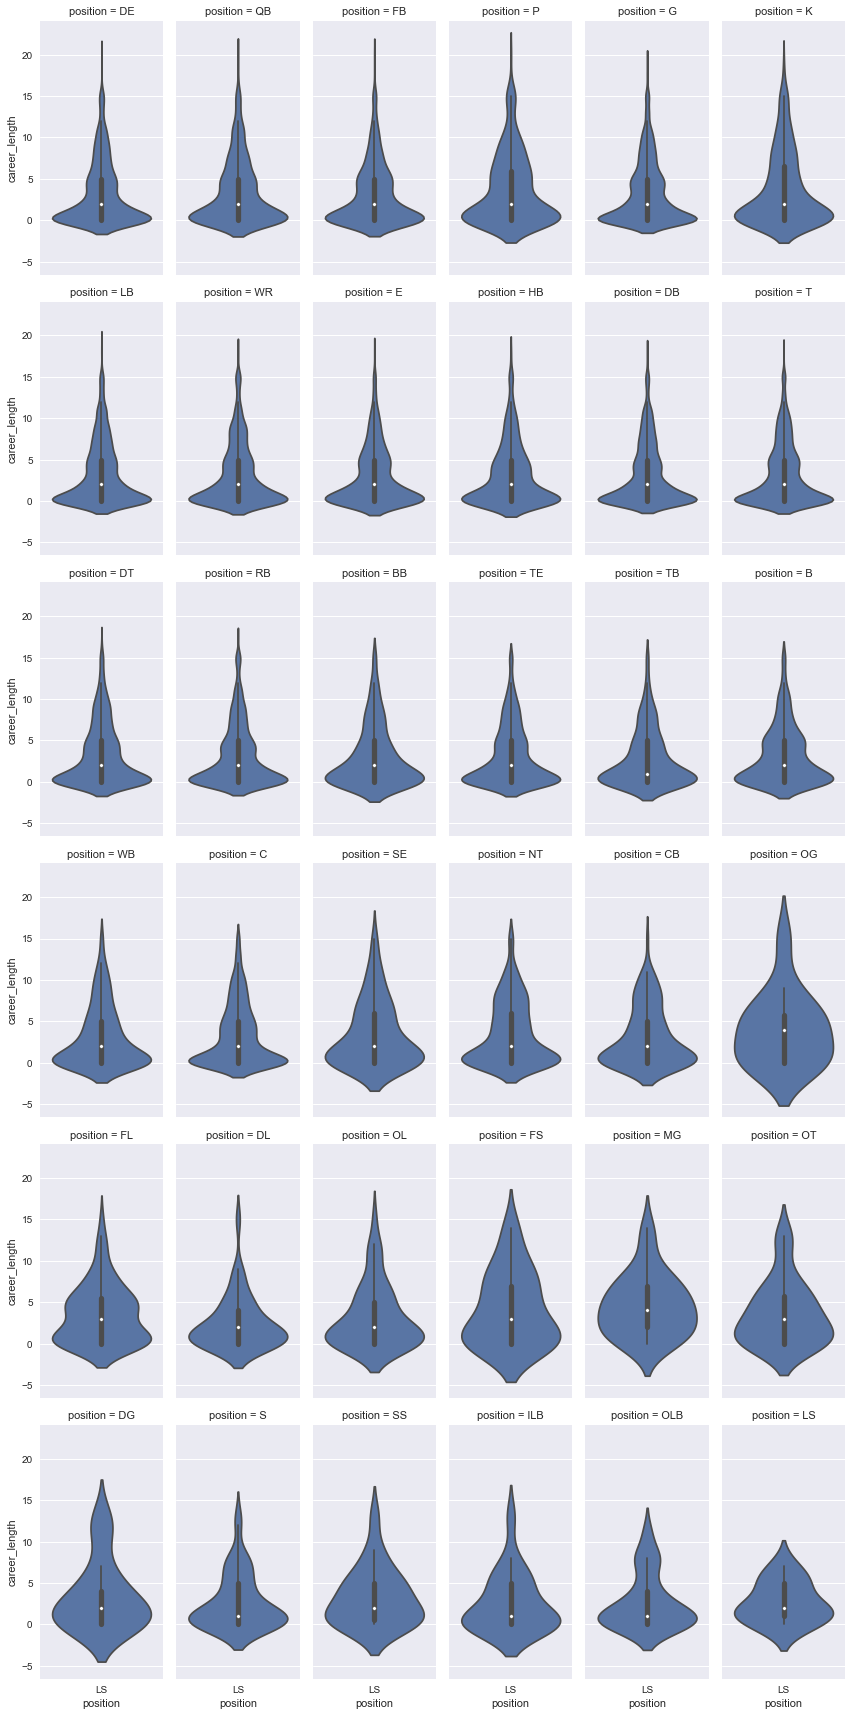

In [44]:
pos_violin_graph = sns.FacetGrid(res2.sort_values(by='career_length',ascending=False), col="position", size=4, aspect=.5, col_wrap=6)
pos_violin_graph = pos_violin_graph.map(sns.violinplot, "position", "career_length")

Quick breakdown of the count of positions that had at least 15 year long careers:

In [71]:
res2[res2['career_length'] >= 15]['position'].value_counts()

DB    46
G     44
WR    40
LB    39
T     35
RB    34
DE    31
QB    19
DT    19
HB    18
FB    14
TE    13
K     13
P     13
C     13
E     12
B      7
NT     6
BB     4
TB     3
WB     3
DL     1
FL     1
CB     1
OL     1
OG     1
SE     1
Name: position, dtype: int64

We see an interesting distribution of position, including WR and RB that have such a bad mean, but are in the top slots for career length

In [97]:
players.sort_values(by='career_length',ascending=False).head(20)

,name,first_name,last_name,birth_city,birth_state,birth_country,birth_date,college,draft_team,draft_round,...,position,height,weight,death_date,death_city,death_state,death_country,year_start,year_end,career_length
5113,Fred DeBernardi,Fred,DeBernardi,Santa Clarita,CA,USA,3/2/1949,Texas-El Paso,Baltimore Colts,11th,...,DE,5-Jun,250.0,NaN,NaN,NaN,NaN,1978,1998,20
5114,Alex Debniak,Alex,Debniak,NaN,NaN,NaN,1/5/1990,Stanford,NaN,NaN,...,FB,2-Jun,240.0,NaN,NaN,NaN,NaN,1978,1998,20
5115,Case deBruijn,Case,deBruijn,Denhaague,NaN,Netherlands,4/11/1960,Idaho St.,Kansas City Chiefs,8th,...,P,Jun-00,176.0,NaN,NaN,NaN,NaN,1978,1998,20
5112,Steve DeBerg,Steve,DeBerg,Oakland,CA,USA,1/19/1954,San Jose St.,Dallas Cowboys,10th,...,QB,3-Jun,210.0,NaN,NaN,NaN,NaN,1978,1998,20
116,Ben Agajanian,Ben,Agajanian,Santa Ana,CA,USA,8/28/1919,New Mexico,NaN,NaN,...,K,Jun-00,215.0,NaN,NaN,NaN,NaN,1945,1964,19
117,Alex Agase,Alex,Agase,Chicago,IL,USA,3/27/1922,Purdue,Green Bay Packers,8th,...,LB-G,10-May,212.0,5/3/2007,Tarpon Springs,FL,NaN,1945,1964,19
11970,Frank Kring,Frank,Kring,Lampassas,TX,USA,12/21/1918,TCU,NaN,NaN,...,LB,Jun-00,190.0,NaN,NaN,NaN,NaN,1980,1998,18
11975,Joe Krivonak,Joe,Krivonak,NaN,NaN,NaN,NaN,South Carolina,Green Bay Packers,6th,...,G,2-Jun,230.0,NaN,NaN,NaN,NaN,1980,1998,18
11974,Frank Kristufek,Frank,Kristufek,McKees Rocks,PA,USA,12/12/1915,Pittsburgh,NaN,NaN,...,T,Jun-00,209.0,6/16/1998,Torrance,CA,NaN,1980,1998,18
11973,Keaton Kristick,Keaton,Kristick,Naperville,IL,USA,12/5/1986,Oregon St.,NaN,NaN,...,LB,3-Jun,234.0,NaN,NaN,NaN,NaN,1980,1998,18


Of the top 20 players with the longest career, 14 started playing in 1980 and left the NFL in 1998.

## Draft Pick

In [151]:
career_by_pick = players.groupby('draft_round')#['career_length']

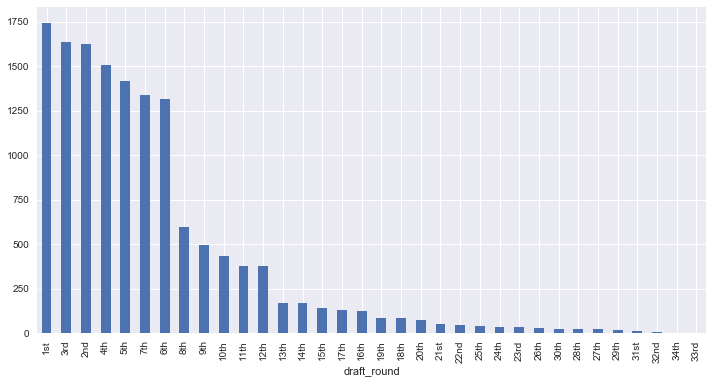

In [152]:
career_by_pick.size().sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

In [153]:
career_by_pick.head()

,name,first_name,last_name,birth_city,birth_state,birth_country,birth_date,college,draft_team,draft_round,...,position,height,weight,death_date,death_city,death_state,death_country,year_start,year_end,career_length
0,Isaako Aaitui,Isaako,Aaitui,NaN,NaN,NaN,1/25/1987,NaN,NaN,NaN,...,NT,4-Jun,315.0,NaN,NaN,NaN,NaN,2013,2013,0
1,Faye Abbott,Faye,Abbott,Clearport,OH,USA,1895-08-16,Syracuse,NaN,NaN,...,BB-FB-TB-QB-WB-,8-May,182.0,1/22/1965,Dayton,OH,NaN,1921,1929,8
2,Vince Abbott,Vince,Abbott,London,NaN,England,5/31/1958,Washington,NaN,NaN,...,K,11-May,207.0,NaN,NaN,NaN,NaN,1921,1929,8
3,Duke Abbruzzi,Duke,Abbruzzi,Warren,RI,USA,8/3/1917,Rhode Island,NaN,NaN,...,HB-DB,10-May,175.0,12/6/1982,Newport,RI,NaN,1921,1929,8
4,Karim Abdul-Jabbar,Karim,Abdul-Jabbar,Los Angeles,CA,USA,6/28/1974,UCLA,Miami Dolphins,3rd,...,RB,10-May,194.0,NaN,NaN,NaN,NaN,1996,2000,4
5,Isa Abdul-Quddus,Isa,Abdul-Quddus,NaN,NaN,NaN,8/3/1989,Fordham,NaN,NaN,...,S,1-Jun,220.0,NaN,NaN,NaN,NaN,1996,2000,4
6,Hamza Abdullah,Hamza,Abdullah,Los Angeles,CA,USA,8/20/1983,Washington St.,Tampa Bay Buccaneers,7th,...,DB,2-Jun,213.0,NaN,NaN,NaN,NaN,1996,2000,4
8,Khalid Abdullah,Khalid,Abdullah,Jacksonville,FL,USA,3/6/1979,Mars Hill,Cincinnati Bengals,5th,...,LB,2-Jun,227.0,NaN,NaN,NaN,NaN,1996,2000,4
10,Rahim Abdullah,Rahim,Abdullah,Jacksonville,FL,USA,3/22/1976,Clemson,Cleveland Browns,2nd,...,LB,5-Jun,233.0,NaN,NaN,NaN,NaN,1996,2000,4
12,Bud Abell,Bud,Abell,Kansas City,MO,USA,12/21/1940,Missouri,Kansas City Chiefs,23rd,...,LB,3-Jun,220.0,NaN,NaN,NaN,NaN,1926,1926,0


Most players in the NFL are getting drafted by the end of the 6th round. 

In [128]:
career_mean_by_pick = players.groupby('draft_round')['career_length'].mean()

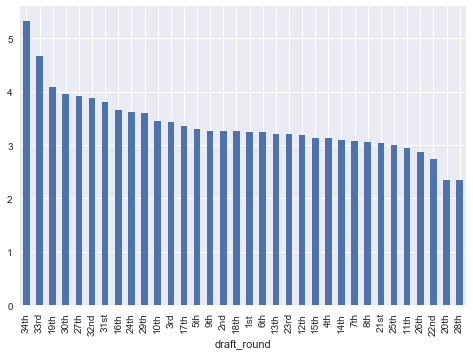

In [130]:
career_mean_by_pick.sort_values(ascending=False).plot(kind='bar')

Why does the 34th round have the greatest mean career length?

In [154]:
players[players['draft_round'] == '34th']

,name,first_name,last_name,birth_city,birth_state,birth_country,birth_date,college,draft_team,draft_round,...,position,height,weight,death_date,death_city,death_state,death_country,year_start,year_end,career_length
19099,Roger Shoals,Roger,Shoals,Baltimore,MD,USA,12/13/1938,Maryland,Dallas Texans,34th,...,T,4-Jun,260.0,NaN,NaN,NaN,NaN,1963,1971,8
20265,Steve Stonebreaker,Steve,Stonebreaker,Moline,IL,USA,10/28/1938,Detroit Mercy,Denver Broncos,34th,...,LB-TE,3-Jun,223.0,3/28/1995,River Ridge,LA,NaN,1921,1921,0
20616,Don Talbert,Don,Talbert,Louisville,MS,USA,3/1/1939,Texas,Houston Oilers,34th,...,T-LB,5-Jun,255.0,NaN,NaN,NaN,NaN,1960,1968,8


Only three people in the dataset, two if which played for 8 years. 

In [166]:
players[players['draft_round'] == '33rd']

,name,first_name,last_name,birth_city,birth_state,birth_country,birth_date,college,draft_team,draft_round,...,position,height,weight,death_date,death_city,death_state,death_country,year_start,year_end,career_length
256,Duane Allen,Duane,Allen,Alhambra,CA,USA,10/21/1937,Mount San Antonio JC,Denver Broncos,33rd,...,TE,4-Jun,225.0,5/7/2003,Pasadena,CA,NaN,1961,1962,1
13085,Jacque MacKinnon,Jacque,MacKinnon,Dover,NJ,USA,11/10/1938,Colgate,San Diego Chargers,33rd,...,TE-FB,4-Jun,235.0,3/6/1975,San Diego,CA,NaN,1954,1959,5
22522,Gene White,Gene,White,NaN,NaN,NaN,NaN,Florida A&M,Oakland Raiders,33rd,...,HB,1-Jun,197.0,NaN,NaN,NaN,NaN,1994,2002,8


Same deal the 33rd round picks